In [92]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image,load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [13]:
flower = load_sample_image("flower.jpg")
flower = np.array(flower)/255.0

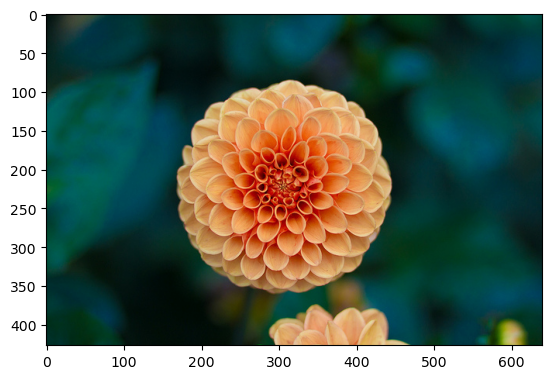

In [33]:
plt.imshow(flower);

In [42]:
w,h,c  = flower.shape
assert c == 3
image_array = np.reshape(flower,(w*h,c))
image_sample = shuffle(image_array,random_state=42)[:1000]

In [90]:
n_colors = 5
kmeans = KMeans(n_clusters=n_colors,random_state=42).fit(image_sample)
labels = kmeans.predict(image_array)

In [68]:
def reconstruct_image(cluster_center,labels,w,h):
    c = cluster_center.shape[1]
    image = np.zeros((w,h,c))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_center[labels[label_index]]
            label_index += 1
    return image

In [75]:
kmeans.cluster_centers_

array([[0.85513539, 0.63671802, 0.40644258],
       [0.00715173, 0.28314158, 0.28907254],
       [0.02803629, 0.14918545, 0.1145937 ],
       [0.6866257 , 0.31729587, 0.12595844]])

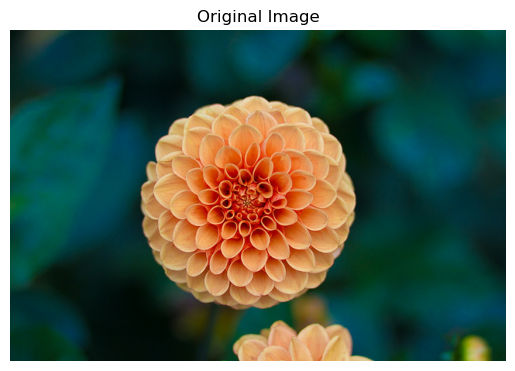

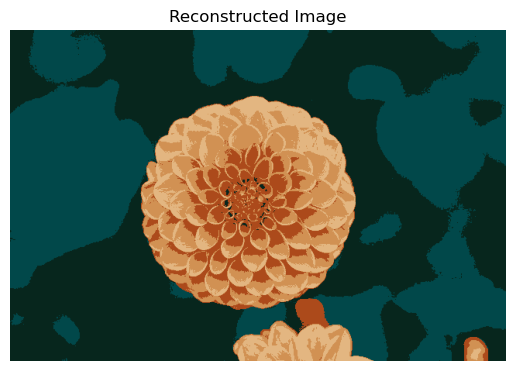

In [91]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original Image")
plt.imshow(flower)


plt.figure(2)
plt.clf()
plt.axis("off")
plt.title("Reconstructed Image")
plt.imshow(reconstruct_image(kmeans.cluster_centers_,labels,w,h))

## PCA

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
iris_labels = iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [96]:
pca = PCA(n_components=2)
X_r =pca.fit(X).transform(X)

In [99]:
print(f"Explained Variance Ratio From PCA:{pca.explained_variance_ratio_}")

Explained Variance Ratio From PCA:[0.92461872 0.05306648]


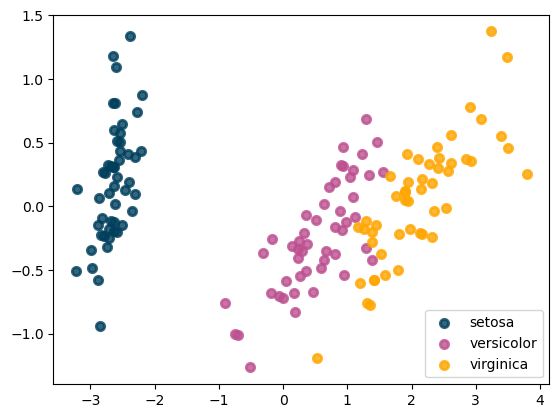

In [ ]:
colors = ["#003f5c","#bc5090","#ffa600"]
lw = 2
plt.figure()
for color,i, target_name in zip(colors,[0,1,2],iris_labels):
    plt.scatter(X_r[y==i,0],X_r[y==i,1],c=color,alpha=0.8,linewidths=lw,label=target_name)
plt.legend(loc="best")

